# Interesting Insights into Loans
## by Carmen Wong

## Investigation Overview
The overall goals of this presentation is to present my findings of some interesting insights and facts about loans that I, or maybe most normal people, don't know about and not aware of.


## Dataset Overview
The [Loan dataset](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1581581520570000) that I used was from Prosper. It contain 113,937 loans with 81 variables on each loan from 2005-11-09 to 2014-03-10, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The description of the variables could be refer to in this [variable dictionary document](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). 

In [16]:
# import all packages and set plots to be embedded inline
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [17]:
# load in the dataset into a pandas dataframe
DATA_PATH = 'data'
DATA_FILE = 'prosperLoanData.csv'
DATASET = os.path.join(DATA_PATH, DATA_FILE)
CLEANED_DATA = os.path.join(DATA_PATH, 'cleaned_data')
BASE_COLOR = sns.color_palette()[0]
FIG_SIZE = (15,5)
FIG_SIZE_TWO_ROWS = (15,10)

sns.set_theme(style='darkgrid')
rcParams['figure.figsize'] = (10,5)
rcParams['axes.titlesize'] = 18
rcParams['axes.labelsize'] = 13
rcParams['axes.titlepad'] = 10

## High and Low Seasons for Loans
I am surprised by this findings. People Start Borrowing Money From August and Trailing Off in January. 

My impression is that people need the most money a few weeks before Summer and a few weeks before Thanksgiving and the year-end holidays. I am surprised to find that people starting to borrow as early as August and trailing off after January. Summer months were the lowest months of the year.

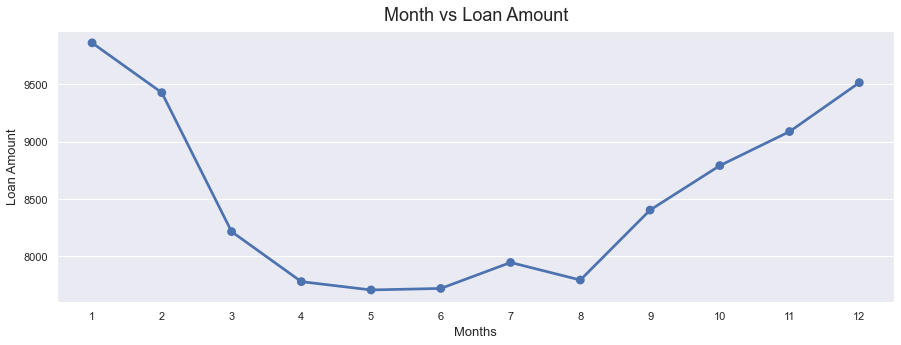

In [18]:
def explore_months_vs_loan_amount():
    '''
    Explore which month people borrow the most.
    '''
    df = pd.read_csv(CLEANED_DATA, parse_dates=[3])
    
    dates = df[['ListingCreationDate', 'LoanOriginalAmount']]
    dates.set_index('ListingCreationDate')
    dates = dates.groupby(by=[df.ListingCreationDate.dt.month]).mean()
    dates.columns = ['LoanAmount']
    
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=FIG_SIZE)
    sns.pointplot(data=dates, y='LoanAmount', x=dates.index, ax=ax1, color=BASE_COLOR);

    ax1.set(title='Month vs Loan Amount',
            ylabel='Loan Amount',
            xlabel='Months')

explore_months_vs_loan_amount()

## Californian Carried the Most Loans

It is interesting to find that California is the number one state that carried the most loans and is double the number of loans of the second most state, Texas. The top five states are CA, TX, NY, FL, IL, and Californians carried $126,249,503.

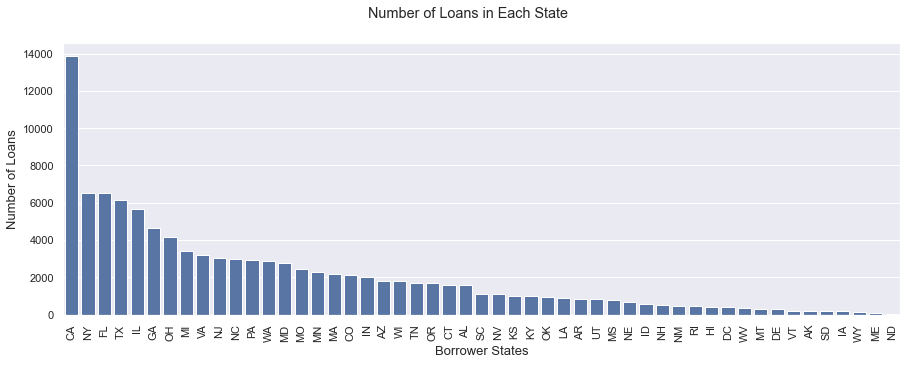

In [19]:
def explore_number_of_loans_vs_states():
    '''
    Explore loans across United States.
    '''
    df = pd.read_csv(CLEANED_DATA)
    
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=FIG_SIZE)
    
    df_states = df.groupby(['BorrowerState']).ListingNumber.count()
    df_states = df_states.reset_index()
    df_states = df_states.sort_values(by=['ListingNumber'], ascending=False)
    
    fig.suptitle('Number of Loans in Each State')
    sns.barplot(data=df_states, x='BorrowerState', y='ListingNumber', ax=ax1, color=BASE_COLOR)
        
    ax1.set(xlabel='Borrower States',
            ylabel='Number of Loans')
    
    props = {'rotation': 90}
    plt.setp(ax1.get_xticklabels(), **props)
    
explore_number_of_loans_vs_states()

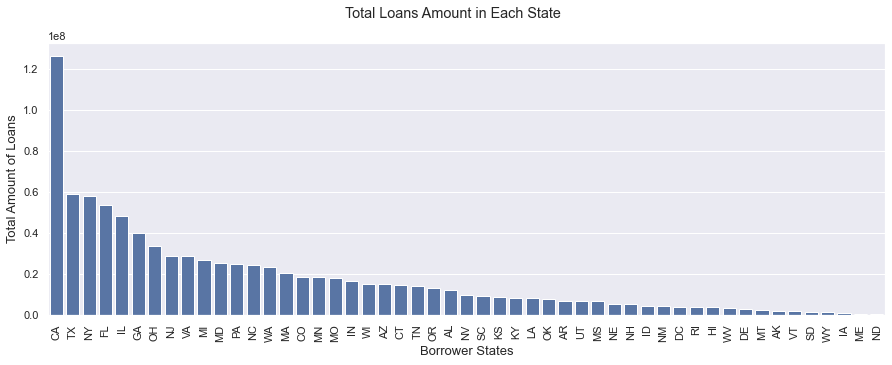

In [20]:
def explore_state_vs_total_loan_amount():
    '''
    Explore loan amount across United States.
    '''
    df = pd.read_csv(CLEANED_DATA)
    
    # Drop rows with NaN values
    nan_rows = df[df.BorrowerState.isnull()==True]
    df.drop(nan_rows.index, inplace=True)
    assert df.BorrowerState.isnull().sum() == 0
    
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=FIG_SIZE)
    
    df_states = df.groupby(['BorrowerState']).LoanOriginalAmount.sum()
    df_states = df_states.reset_index()
    df_states = df_states.sort_values(by=['LoanOriginalAmount'], ascending=False)
    
    fig.suptitle('Total Loans Amount in Each State')
    sns.barplot(data=df_states, x='BorrowerState', y='LoanOriginalAmount', ax=ax1, color=BASE_COLOR)
        
    ax1.set(xlabel='Borrower States',
            ylabel='Total Amount of Loans')
    
    props = {'rotation': 90}
    plt.setp(ax1.get_xticklabels(), **props)
        
explore_state_vs_total_loan_amount()

## Higher Credit Score Got Bigger Loan Paid Less in Annual Rate

On average, people with higher credit score got bigger loans, but they paid much less in annual rate. Some smaller loans paid as high as 36% whereas some bigger loan paid as low as ~5%.

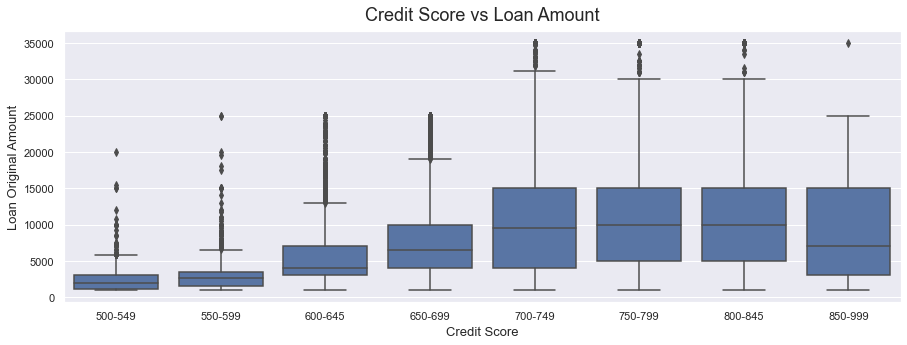

In [21]:
def explore_credit_score_vs_loan_amount():
    '''
    Explore how credit score relate to borrowing loan amount.
    '''
    df = pd.read_csv(CLEANED_DATA)
    data = df.sort_values('CreditRange')[['CreditRange', 'LoanOriginalAmount']]
    
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=FIG_SIZE)
    sns.boxplot(data=data, x='CreditRange', y='LoanOriginalAmount', color=BASE_COLOR, ax=ax1)
    
    ax1.set(title='Credit Score vs Loan Amount',
            xlabel='Credit Score',
            ylabel='Loan Original Amount')
    
explore_credit_score_vs_loan_amount()

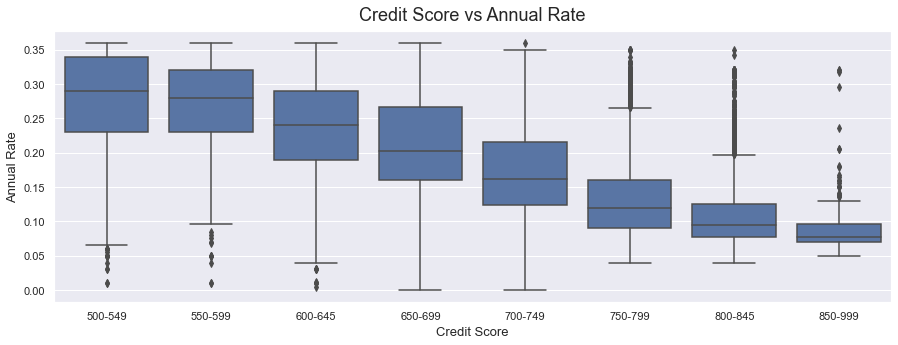

In [22]:
def explore_credit_score_vs_annual_rate():
    '''
    Explore how credit score affect annual rate.
    '''
    df = pd.read_csv(CLEANED_DATA)
    
    # Drop zero rate
    zeros = df.query('BorrowerRate==0')
    df = df.drop(zeros.index)
    
    data = df.sort_values('CreditRange')[['CreditRange', 'BorrowerRate', 'AvgCreditScore']]
    
    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=FIG_SIZE)
    sns.boxplot(data=data, x='CreditRange', y='BorrowerRate', color=BASE_COLOR, ax=ax1)
    
    ax1.set(title='Credit Score vs Annual Rate',
            xlabel='Credit Score',
            ylabel='Annual Rate')
        
explore_credit_score_vs_annual_rate()